# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [881]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

#### Importing raw data as a dataframe using read_csv

In [882]:
# place your code into this Code cell
df=pd.read_csv('data/city_day.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

#### Command to show 5 random rows

In [883]:
df.sample(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
17219,Jaipur,2019-03-08,38.52,86.80,6.54,23.03,24.75,24.51,0.93,12.41,57.35,1.14,6.92,NaN,98.0,Satisfactory
12945,Gurugram,2017-05-25,162.88,NaN,16.63,19.45,NaN,NaN,0.54,1.93,69.75,0.02,1.95,NaN,NaN,NaN
2918,Amaravati,2020-01-29,29.98,51.68,2.24,9.21,6.72,17.48,0.52,12.76,32.35,0.23,0.36,0.11,59.0,Satisfactory
25341,Patna,2019-06-17,51.48,NaN,6.11,4.51,4.87,NaN,1.14,43.87,102.74,1.16,6.89,4.95,NaN,NaN
24626,Patna,2017-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Command to show each column name and their data types

In [884]:
print(df.dtypes)

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object


#### Commands to show unique features

##### The dataset offers a time series for each city listed with data recorded on a daily basis for the time periods listed. The following command shows 5 such rows of daily data for Delhi

In [885]:
d1= df.loc[df['City']=='Delhi'].head(5)
d1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


##### The dataset assigns different categories to cities based on the Air Quality Index such as 'Severe', 'Moderate', 'Very Poor' etc. Show by below commands

In [886]:
d2 = df[['City','AQI','AQI_Bucket']].dropna().sample(5)
d2

,City,AQI,AQI_Bucket
28276,Visakhapatnam,108.0,Moderate
3991,Amritsar,79.0,Satisfactory
7058,Brajrajnagar,114.0,Moderate
23521,Mumbai,56.0,Satisfactory
15864,Hyderabad,48.0,Good


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

#### Print the number of missing data in every column

In [887]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

#### Convert the date column to a datetype object

In [888]:
df["Date"] = df["Date"].astype("datetime64")
df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

#### Classify the uncategorized AQI_Bucket values as 'unclassified'

In [889]:
df[['AQI_Bucket']]=df[['AQI_Bucket']].fillna("Unclassified")
df.loc[df['AQI_Bucket']=='Unclassified'].sample(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
22750,Mumbai,2017-06-14,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,Unclassified
21980,Mumbai,2015-05-06,NaN,NaN,NaN,NaN,28.01,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,Unclassified
24595,Patna,2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unclassified
22179,Mumbai,2015-11-21,NaN,NaN,NaN,NaN,143.35,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,Unclassified
21968,Mumbai,2015-04-24,NaN,NaN,NaN,NaN,28.13,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,Unclassified


#### Assign the missing AQI values corresponding to the unclassified 'AQI' buckets the value of -1.0 to later differentiate it from rest of the values

In [890]:
df[['AQI']]=df[['AQI']].fillna(-1)
df.loc[df['AQI']==-1].sample(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
22295,Mumbai,2016-03-16,NaN,NaN,NaN,NaN,12.77,NaN,0.00,NaN,NaN,0.00,0.00,0.00,-1.0,Unclassified
22911,Mumbai,2017-11-22,NaN,NaN,NaN,NaN,18.83,NaN,0.00,NaN,NaN,0.00,0.00,0.00,-1.0,Unclassified
22622,Mumbai,2017-02-06,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,-1.0,Unclassified
15058,Hyderabad,2016-04-25,37.42,89.62,14.75,59.18,33.62,21.5,0.09,30.2,57.29,1.65,8.94,3.63,-1.0,Unclassified
22957,Mumbai,2018-01-07,NaN,NaN,NaN,NaN,86.45,NaN,2.62,NaN,NaN,0.00,0.00,0.00,-1.0,Unclassified


#### Since the data contains many missing values for the numeric data that represents the composition of the air, and this data can vary a lot within weeks, the calculation of any filler values needed a well-thought implementation. A decision was taken to first split the dataframe into smaller ones according to cities, and then split these smaller ones into further smaller ones where 180 consecutive rows are taken (essentially representing half a year). This splitting to calculate averages allows to account for variations across days by trying to minimize any errors or significantly different approximations from what could've been the real data. Further, splitting dataframes according to cities allows to keep averages limited to a specific city's context and not let other cities change the value. Any rows remaining that still have missing values will then be dropped since it can be reasonably understood that data is insufficient to generate any averages within the 180 day period and that taking an average over a larger period of time would start to ignore the variation of data over time. 

In [891]:
new_emp=pd.DataFrame() #empty dataframe
for City, df_city in df.groupby('City'): #split into smaller dataframes for each city
    for i in range(0,df_city.shape[0]-180,180): #split into smaller dataframes for every 180 days (approx. half a year)
        tmp=df_city.iloc[i:i+180]
        tmp=tmp.fillna(tmp.mean(numeric_only=True)) #fill missing values with the average for that period for the numeric fields
        new_emp=new_emp.append(tmp) #append the modified dataframe
df=new_emp #assign the munged dataframe to the original dataframe
df=df.dropna() #drop any missing records
print('Number of records:')
print(df.shape[0])
print('Number of missing records by columns')
print(df.isnull().sum())
df.sample(5)

Number of records:
7560
Number of missing records by columns
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
3697,Amritsar,2018-11-13,45.16,129.04,29.69,38.70,66.33,9.46,0.000000,4.964355,15.79,6.13,1.34,9.11,101.0,Moderate
2402,Amaravati,2018-08-31,24.94,69.22,3.56,19.99,13.29,20.42,1.400000,11.980000,28.10,0.04,0.06,0.10,97.0,Satisfactory
2138,Amaravati,2017-12-10,50.32,102.77,1.73,33.85,19.41,12.56,0.100000,13.650000,68.15,0.20,4.29,0.10,132.0,Moderate
3545,Amritsar,2018-06-14,194.84,917.08,22.27,17.41,39.68,6.45,0.708603,6.880000,28.53,0.70,2.57,4.57,732.0,Severe
28182,Visakhapatnam,2016-10-22,66.93,100.71,23.20,68.56,51.78,15.93,1.340000,18.090000,28.29,8.70,14.62,13.50,122.0,Moderate


##### Insert a column to indicate the number of month

In [892]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.sample(5)

<ipython-input-892-bd2044af4af1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df['Date']).month


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
11915,Delhi,2019-08-14,33.21,58.36,16.96,31.90,33.85,29.08,1.19,8.50,31.43,1.94,21.44,6.58,93.0,Satisfactory,8
11249,Delhi,2017-10-17,121.70,212.35,48.01,57.08,49.91,42.92,1.36,17.44,30.46,0.99,3.39,0.09,313.0,Very Poor,10
15291,Hyderabad,2016-12-14,44.66,62.82,9.33,27.18,5.73,19.33,0.28,7.84,36.95,0.01,0.05,0.03,82.0,Satisfactory,12
19658,Kolkata,2019-12-27,79.44,144.61,9.66,38.43,48.00,27.49,0.96,12.59,34.64,22.44,29.42,1.49,179.0,Moderate,12
16277,Hyderabad,2019-08-27,18.86,65.41,3.16,15.90,9.84,11.57,0.38,7.78,22.29,0.17,1.43,0.07,65.0,Satisfactory,8


##### Insert a column to indicate the year

In [893]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.sample(5)

<ipython-input-893-ac24ee364171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['Date']).year


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,year
15473,Hyderabad,2017-06-14,19.65,42.88,7.290000,16.500000,8.82,8.010000,0.25,3.87,54.73,0.07,0.76,0.510000,84.0,Satisfactory,6,2017
28568,Visakhapatnam,2017-11-12,56.40,98.27,7.271343,30.670426,0.00,4.949195,0.84,8.57,112.66,2.88,3.89,0.530000,150.0,Moderate,11,2017
11824,Delhi,2019-05-15,84.81,191.04,31.890000,57.750000,59.46,43.800000,1.52,20.93,41.85,5.07,36.61,0.770000,194.0,Moderate,5,2019
2940,Amaravati,2020-02-20,49.10,74.88,2.170000,12.980000,8.68,17.400000,0.44,17.74,49.28,0.31,0.67,0.140000,77.0,Satisfactory,2,2020
10442,Delhi,2015-08-02,47.81,123.24,40.080000,37.960000,165.43,24.200000,0.82,10.27,46.38,1.61,6.87,2.621538,213.0,Poor,8,2015


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

##### Mean AQI in Hyderabad for each month over the recorded time period

In [894]:
(df[(df['City']=='Hyderabad') & (df['AQI']!=-1)]).groupby('month')['AQI'].mean()

month
1     140.180645
2     123.730496
3     110.258065
4     102.872483
5     101.838710
6      84.368000
7      79.490196
8      81.558824
9      88.909091
10    125.183673
11    126.726667
12    129.116129
Name: AQI, dtype: float64

Median AQI in Visakhapatnam for each month

In [895]:
(df[(df['City']=='Visakhapatnam') & (df['AQI']!=-1) ]).groupby('month')['AQI'].median()

month
1     173.0
2     137.5
3     104.0
4      76.5
5      84.0
6     100.0
7      90.5
8      94.5
9      96.0
10    110.0
11    114.0
12    130.0
Name: AQI, dtype: float64

##### Range (difference between highest and lowest) of AQI in Amaravati for each month

In [896]:
df_amr=(df[(df['City']=='Amaravati') & (df['AQI']!=-1)]).groupby('month')['AQI']
dmin=df_amr.min()
dmax=df_amr.max()
dmax-dmin

month
1     265.0
2     134.0
3      95.0
4      98.0
5     150.0
6     117.0
7      78.0
8      88.0
9      54.0
10    115.0
11    170.0
12    264.0
Name: AQI, dtype: float64

##### Number of days in the different AQI_Bucket categories for Delhi

In [897]:
(df[df['City']=='Delhi'].groupby(['month', 'AQI_Bucket']).agg(['count']))['AQI']

count
month AQI_Bucket         
1     Moderate          6
      Poor             28
      Severe           47
      Very Poor        74
2     Moderate         19
      Poor             45
      Severe            1
      Very Poor        77
3     Moderate         62
      Poor             67
      Satisfactory      9
      Very Poor        17
4     Moderate         37
      Poor             72
      Satisfactory      9
      Severe            2
      Very Poor        30
5     Moderate         49
      Poor             58
      Satisfactory      3
      Severe            4
      Very Poor        41
6     Good              1
      Moderate         52
      Poor             48
      Satisfactory      7
      Severe            5
      Unclassified      1
      Very Poor        13
7     Good             14
      Moderate         56
      Poor             20
      Satisfactory     33
      Very Poor         1
8     Good              6
      Moderate         43
      Poor             24
      Satisfactory     43
      Unclassified      8
9     Moderate         61
      Poor             19
      Satisfactory     38
      Very Poor         2
10    Moderate         21
      Poor             43
      Satisfactory      1
      Severe           11
      Very Poor        48
11    Moderate          3
      Poor             15
      Satisfactory      1
      Severe           43
      Very Poor        58
12    Moderate          4
      Poor             21
      Severe           38
      Very Poor        61

##### Group by cities and calculate the mean O3 concentration and then sort in descending order to show the 10 cities with the highest average O3 concentration

In [898]:
(df.groupby('City').mean())['O3'].sort_values(ascending=False)

City
Delhi            51.001514
Gurugram         40.731444
Visakhapatnam    39.689062
Amaravati        38.198185
Hyderabad        34.092103
Kolkata          31.334333
Patna            25.846944
Amritsar         22.882916
Chandigarh       14.629778
Name: O3, dtype: float64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### For visualization, wherever the month of December is choosen is because of the specific bad AQI situation in that particular month over the past couple of years. The city of Delhi is choosen because of its importance as the Capital of India. The Year of 2019 is choosen for the availability of a larger subset of data among the entire data.

##### Line graph showing variation of AQI over time in Delhi for 2019

<AxesSubplot:xlabel='Date'>

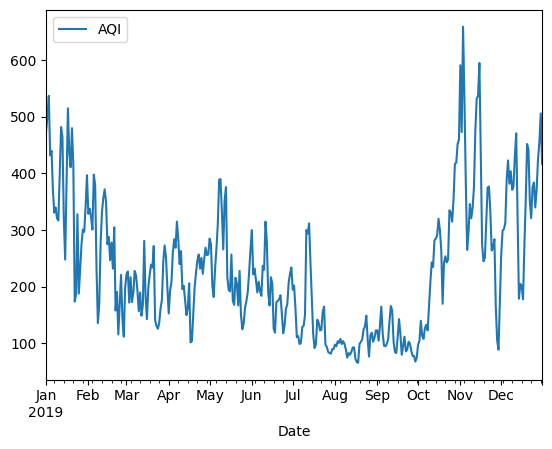

In [900]:
df[(df['City']=='Delhi') & (df['year']==2019) & (df['AQI']!=-1)].plot(x='Date',y='AQI')

##### Pie chart showing percentage composition of Air on 27th October 2019 (date of Diwali, a religious festival) in Delhi

Text(0, 0.5, 'Air composition')

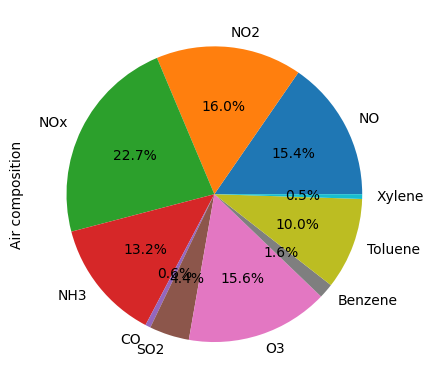

In [938]:
t=df[(df['City']=='Delhi') & (df['Date']=='2019-10-27')]
s=t.transpose()
s=(s.drop(labels=['City', 'Date','AQI','AQI_Bucket','month','year','PM10','PM2.5']))
s.plot.pie(y=11989,legend=False,autopct='%1.1f%%').set_ylabel('Air composition')

##### Bar graph showing the cities sorted in descending order of mean AQI in 2019

<AxesSubplot:ylabel='City'>

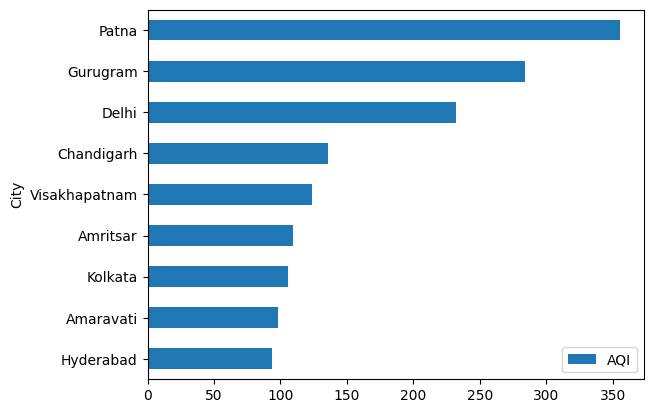

In [971]:
((((df[(df['year']==2019) & (df['AQI']!=-1)]).groupby('City')).mean(numeric_only=True)).sort_values('AQI',ascending=False)[::-1]).plot.barh(y='AQI', rot=0)

##### Stacked area graph to show the presence of particulate matter of different types in the air in Delhi for December 2019

<AxesSubplot:xlabel='December 2019', ylabel='Particulate matter'>

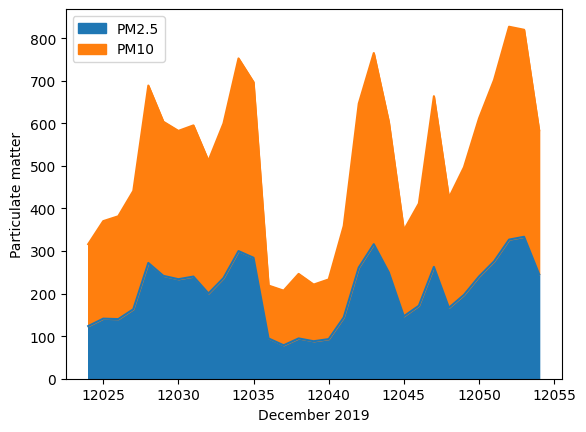

In [983]:
(df[(df['month']==12) & (df['year']==2019) & (df['City']=='Delhi')])[['PM2.5', 'PM10'] ].plot.area(
    xlabel='December 2019', 
    ylabel='Particulate matter', 
    stacked=True
)

##### Line graphs to test if there is any relation between the amount of NO and O3 in Delhi's air. To sample, the month of December 2019 is selected

<AxesSubplot:xlabel='December 2019', ylabel='Amount'>

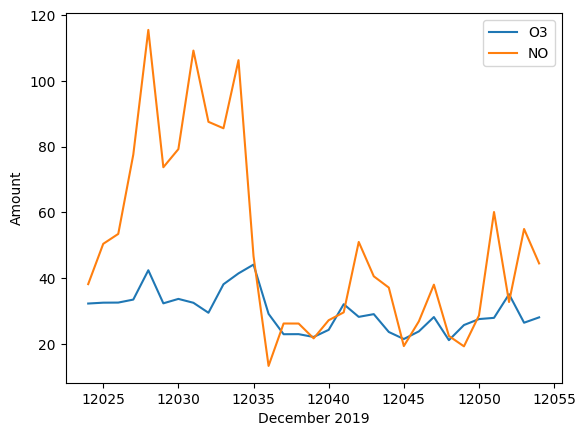

In [1007]:
((df[(df['month']==12) & (df['year']==2019) & (df['City']=='Delhi')]))[['O3','NO']].plot(xlabel='December 2019',ylabel='Amount')